# 02: model training

this notebook demonstrates training cnn models on cifar-10 with different architectures and hyperparameters.


In [1]:
#library imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from src.config import Config
from src.datasets import get_cifar10_loaders, get_cifar10_classes
from src.models import create_model, list_available_models, get_model_info
from src.trainer import Trainer
from src.utils import plot_training_curves, plot_confusion_matrix, set_seed
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

Libraries imported successfully!
PyTorch version: 2.9.0+cu128
CUDA available: True


## load data and create model


In [2]:
#configs and setup
config = Config()
config.epochs = 10
config.batch_size = 64
config.lr = 0.001
set_seed(config.seed)
train_loader, val_loader, test_loader = get_cifar10_loaders(config)
class_names = get_cifar10_classes()

print(f"Configuration: {config.epochs} epochs, batch size {config.batch_size}")
print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")
print(f"Classes: {class_names}")

Configuration: 10 epochs, batch size 64
Training samples: 40000
Validation samples: 10000
Test samples: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## model information display


In [3]:
#shows all available models
print("Available Models:")
print("=" * 50)
for model_name in list_available_models():
    info = get_model_info(model_name)
    print(f"{model_name:20} - {info['params']:8} - {info['description']}")

print(f"\nTotal models available: {len(list_available_models())}")

Available Models:
simple_cnn           - ~1M      - Simple CNN with 3 conv layers
improved_cnn         - ~2M      - CNN with residual connections
resnet18             - ~11M     - ResNet-18 with pretrained backbone
resnet34             - ~21M     - ResNet-34 with pretrained backbone
resnet50             - ~25M     - ResNet-50 with pretrained backbone
vgg11                - ~9M      - VGG-11 with pretrained backbone
vgg16                - ~138M    - VGG-16 with pretrained backbone
efficientnet_b0      - ~5M      - EfficientNet-B0 with pretrained backbone
mobilenet_v2         - ~3M      - MobileNetV2 with pretrained backbone
vit                  - ~86M     - Vision Transformer with pretrained backbone
densenet121          - ~8M      - DenseNet-121 with pretrained backbone
squeezenet           - ~1M      - SqueezeNet with pretrained backbone

Total models available: 12


## Simple CNN model creation and tests

In [4]:
print("Creating Simple CNN...")
simple_model = create_model('simple_cnn', config).to(config.device)
print(f"Model: {simple_model.__class__.__name__}")
print(f"Parameters: {sum(p.numel() for p in simple_model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in simple_model.parameters() if p.requires_grad):,}")

#test the forward pass 
sample_batch = next(iter(train_loader))
images, labels = sample_batch
images, labels = images.to(config.device), labels.to(config.device)
with torch.no_grad():
    outputs = simple_model(images)
    print(f"Input shape: {images.shape}")
    print(f"Output shape: {outputs.shape}")
    print(f"Output range: [{outputs.min():.3f}, {outputs.max():.3f}]")

Creating Simple CNN...
Model: SimpleCNN
Parameters: 1,147,914
Trainable parameters: 1,147,914
Input shape: torch.Size([64, 3, 32, 32])
Output shape: torch.Size([64, 10])
Output range: [-1.043, 1.253]


## simple cnn training


In [5]:
print("Training Simple CNN...")
simple_trainer = Trainer(simple_model, config)
simple_history = simple_trainer.fit(train_loader, val_loader)
print(f"Simple CNN - Best validation accuracy: {max(simple_history['val_acc']):.4f}")
print(f"Simple CNN - Final training accuracy: {simple_history['train_acc'][-1]:.4f}")
print(f"Simple CNN - Final validation accuracy: {simple_history['val_acc'][-1]:.4f}")

Training Simple CNN...
Training on cuda
Model parameters: 1,147,914

Epoch 1/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 384.00it/s]


Train Loss: 1.7376, Train Acc: 36.16%
Val Loss: 1.3845, Val Acc: 50.49%
New best validation accuracy: 50.49%

Epoch 2/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 414.55it/s]


Train Loss: 1.4109, Train Acc: 48.60%
Val Loss: 1.2547, Val Acc: 55.50%
New best validation accuracy: 55.50%

Epoch 3/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 477.62it/s]


Train Loss: 1.2738, Train Acc: 54.22%
Val Loss: 1.0769, Val Acc: 62.29%
New best validation accuracy: 62.29%

Epoch 4/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 392.26it/s]


Train Loss: 1.1745, Train Acc: 57.85%
Val Loss: 1.0217, Val Acc: 64.15%
New best validation accuracy: 64.15%

Epoch 5/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 498.99it/s]


Train Loss: 1.1094, Train Acc: 60.59%
Val Loss: 0.9562, Val Acc: 66.49%
New best validation accuracy: 66.49%

Epoch 6/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 424.49it/s]


Train Loss: 1.0523, Train Acc: 62.63%
Val Loss: 0.9048, Val Acc: 68.17%
New best validation accuracy: 68.17%

Epoch 7/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 425.07it/s]


Train Loss: 1.0032, Train Acc: 64.47%
Val Loss: 0.8709, Val Acc: 69.64%
New best validation accuracy: 69.64%

Epoch 8/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 423.16it/s]


Train Loss: 0.9665, Train Acc: 66.11%
Val Loss: 0.8613, Val Acc: 69.20%

Epoch 9/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 362.34it/s]


Train Loss: 0.9307, Train Acc: 67.20%
Val Loss: 0.7979, Val Acc: 72.11%
New best validation accuracy: 72.11%

Epoch 10/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 464.58it/s]

Train Loss: 0.9056, Train Acc: 67.86%
Val Loss: 0.7888, Val Acc: 72.12%
New best validation accuracy: 72.12%

Training completed in 24.34s
Best validation accuracy: 72.12%
model registered with id: SimpleCNN_20251025_140542
Simple CNN - Best validation accuracy: 72.1200
Simple CNN - Final training accuracy: 67.8650
Simple CNN - Final validation accuracy: 72.1200


## Improved CNN Model Creation and Training

In [6]:
print("Creating Improved CNN...")
improved_model = create_model('improved_cnn', config).to(config.device)
print(f"Model: {improved_model.__class__.__name__}")
print(f"Parameters: {sum(p.numel() for p in improved_model.parameters()):,}")
print("Training Improved CNN...")
improved_trainer = Trainer(improved_model, config)
improved_history = improved_trainer.fit(train_loader, val_loader)
print(f"Improved CNN - Best validation accuracy: {max(improved_history['val_acc']):.4f}")
print(f"Improved CNN - Final training accuracy: {improved_history['train_acc'][-1]:.4f}")
print(f"Improved CNN - Final validation accuracy: {improved_history['val_acc'][-1]:.4f}")

Creating Improved CNN...
Model: ImprovedCNN
Parameters: 1,186,826
Training Improved CNN...
Training on cuda
Model parameters: 1,186,826

Epoch 1/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 224.94it/s]


Train Loss: 1.6507, Train Acc: 39.24%
Val Loss: 1.5297, Val Acc: 45.06%
New best validation accuracy: 45.06%

Epoch 2/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 236.19it/s]


Train Loss: 1.3364, Train Acc: 51.95%
Val Loss: 1.2169, Val Acc: 56.43%
New best validation accuracy: 56.43%

Epoch 3/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 244.39it/s]


Train Loss: 1.2003, Train Acc: 57.39%
Val Loss: 1.1505, Val Acc: 58.66%
New best validation accuracy: 58.66%

Epoch 4/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 239.16it/s]


Train Loss: 1.1064, Train Acc: 60.83%
Val Loss: 1.0415, Val Acc: 63.27%
New best validation accuracy: 63.27%

Epoch 5/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 243.45it/s]


Train Loss: 1.0334, Train Acc: 63.63%
Val Loss: 1.0158, Val Acc: 64.48%
New best validation accuracy: 64.48%

Epoch 6/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 254.42it/s]


Train Loss: 0.9745, Train Acc: 65.75%
Val Loss: 0.9886, Val Acc: 65.63%
New best validation accuracy: 65.63%

Epoch 7/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 245.95it/s]


Train Loss: 0.9262, Train Acc: 67.61%
Val Loss: 0.8796, Val Acc: 69.17%
New best validation accuracy: 69.17%

Epoch 8/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 240.67it/s]


Train Loss: 0.8735, Train Acc: 69.47%
Val Loss: 0.8519, Val Acc: 69.99%
New best validation accuracy: 69.99%

Epoch 9/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 245.23it/s]


Train Loss: 0.8363, Train Acc: 70.64%
Val Loss: 0.8087, Val Acc: 71.60%
New best validation accuracy: 71.60%

Epoch 10/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 242.61it/s]

Train Loss: 0.8020, Train Acc: 72.08%
Val Loss: 0.8173, Val Acc: 71.90%
New best validation accuracy: 71.90%

Training completed in 86.39s
Best validation accuracy: 71.90%
model registered with id: ImprovedCNN_20251025_140733
Improved CNN - Best validation accuracy: 71.9000
Improved CNN - Final training accuracy: 72.0850
Improved CNN - Final validation accuracy: 71.9000


## ResNet18 model creation and training

In [8]:
print("Creating ResNet18...")
resnet_model = create_model('resnet18', config).to(config.device)
print(f"Model: {resnet_model.__class__.__name__}")
print(f"Parameters: {sum(p.numel() for p in resnet_model.parameters()):,}")
print("Training ResNet18...")
resnet_trainer = Trainer(resnet_model, config)
resnet_history = resnet_trainer.fit(train_loader, val_loader)
print(f"ResNet18 - Best validation accuracy: {max(resnet_history['val_acc']):.4f}")
print(f"ResNet18 - Final training accuracy: {resnet_history['train_acc'][-1]:.4f}")
print(f"ResNet18 - Final validation accuracy: {resnet_history['val_acc'][-1]:.4f}")

Creating ResNet18...
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ruskaruma/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████████████████████████████████| 44.7M/44.7M [00:27<00:00, 1.72MB/s]


Model: ResNet18
Parameters: 11,181,642
Training ResNet18...
Training on cuda
Model parameters: 11,181,642

Epoch 1/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 331.03it/s]


Train Loss: 1.3715, Train Acc: 52.53%
Val Loss: 0.8727, Val Acc: 69.66%
New best validation accuracy: 69.66%

Epoch 2/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 310.39it/s]


Train Loss: 0.9269, Train Acc: 68.25%
Val Loss: 0.7218, Val Acc: 74.79%
New best validation accuracy: 74.79%

Epoch 3/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 296.35it/s]


Train Loss: 0.8065, Train Acc: 72.54%
Val Loss: 0.6420, Val Acc: 78.12%
New best validation accuracy: 78.12%

Epoch 4/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 306.23it/s]


Train Loss: 0.7175, Train Acc: 75.48%
Val Loss: 0.6096, Val Acc: 79.23%
New best validation accuracy: 79.23%

Epoch 5/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 319.61it/s]


Train Loss: 0.6653, Train Acc: 77.03%
Val Loss: 0.5724, Val Acc: 80.06%
New best validation accuracy: 80.06%

Epoch 6/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 314.54it/s]


Train Loss: 0.6280, Train Acc: 78.42%
Val Loss: 0.5544, Val Acc: 80.75%
New best validation accuracy: 80.75%

Epoch 7/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 306.39it/s]


Train Loss: 0.5907, Train Acc: 79.70%
Val Loss: 0.5387, Val Acc: 81.19%
New best validation accuracy: 81.19%

Epoch 8/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 264.26it/s]


Train Loss: 0.5621, Train Acc: 80.64%
Val Loss: 0.5226, Val Acc: 81.94%
New best validation accuracy: 81.94%

Epoch 9/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 268.74it/s]


Train Loss: 0.5354, Train Acc: 81.53%
Val Loss: 0.5169, Val Acc: 81.86%

Epoch 10/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 307.86it/s]


Train Loss: 0.5090, Train Acc: 82.42%
Val Loss: 0.5019, Val Acc: 82.43%
New best validation accuracy: 82.43%

Training completed in 126.37s
Best validation accuracy: 82.43%
model registered with id: ResNet18_20251025_141237
ResNet18 - Best validation accuracy: 82.4300
ResNet18 - Final training accuracy: 82.4250
ResNet18 - Final validation accuracy: 82.4300


## EfficientNet model creation and training

In [9]:
print("Creating EfficientNet-B0...")
efficient_model = create_model('efficientnet_b0', config).to(config.device)
print(f"Model: {efficient_model.__class__.__name__}")
print(f"Parameters: {sum(p.numel() for p in efficient_model.parameters()):,}")
print("Training EfficientNet-B0...")
efficient_trainer = Trainer(efficient_model, config)
efficient_history = efficient_trainer.fit(train_loader, val_loader)
print(f"EfficientNet-B0 - Best validation accuracy: {max(efficient_history['val_acc']):.4f}")
print(f"EfficientNet-B0 - Final training accuracy: {efficient_history['train_acc'][-1]:.4f}")
print(f"EfficientNet-B0 - Final validation accuracy: {efficient_history['val_acc'][-1]:.4f}")

Creating EfficientNet-B0...
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /home/ruskaruma/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|███████████████████████████████████████| 20.5M/20.5M [02:43<00:00, 131kB/s]


Model: EfficientNetB0
Parameters: 4,020,358
Training EfficientNet-B0...
Training on cuda
Model parameters: 4,020,358

Epoch 1/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 201.98it/s]


Train Loss: 1.8643, Train Acc: 32.81%
Val Loss: 1.4654, Val Acc: 48.92%
New best validation accuracy: 48.92%

Epoch 2/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 198.51it/s]


Train Loss: 1.3941, Train Acc: 50.80%
Val Loss: 1.2176, Val Acc: 59.12%
New best validation accuracy: 59.12%

Epoch 3/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 194.54it/s]


Train Loss: 1.2019, Train Acc: 57.66%
Val Loss: 1.0374, Val Acc: 64.16%
New best validation accuracy: 64.16%

Epoch 4/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 186.56it/s]


Train Loss: 1.0764, Train Acc: 62.55%
Val Loss: 0.9133, Val Acc: 68.25%
New best validation accuracy: 68.25%

Epoch 5/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 191.70it/s]


Train Loss: 0.9966, Train Acc: 65.37%
Val Loss: 0.8436, Val Acc: 70.54%
New best validation accuracy: 70.54%

Epoch 6/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 189.75it/s]


Train Loss: 0.9225, Train Acc: 68.14%
Val Loss: 0.7913, Val Acc: 72.36%
New best validation accuracy: 72.36%

Epoch 7/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 171.10it/s]


Train Loss: 0.8797, Train Acc: 69.75%
Val Loss: 0.7441, Val Acc: 73.94%
New best validation accuracy: 73.94%

Epoch 8/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 198.81it/s]


Train Loss: 0.8497, Train Acc: 70.77%
Val Loss: 0.7091, Val Acc: 74.75%
New best validation accuracy: 74.75%

Epoch 9/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 193.21it/s]


Train Loss: 0.8041, Train Acc: 72.33%
Val Loss: 0.6789, Val Acc: 75.79%
New best validation accuracy: 75.79%

Epoch 10/10
--------------------------------------------------


Validation: 100%|████████████████████████████| 157/157 [00:00<00:00, 205.90it/s]


Train Loss: 0.7783, Train Acc: 73.22%
Val Loss: 0.6649, Val Acc: 76.17%
New best validation accuracy: 76.17%

Training completed in 124.30s
Best validation accuracy: 76.17%
model registered with id: EfficientNetB0_20251025_141743
EfficientNet-B0 - Best validation accuracy: 76.1700
EfficientNet-B0 - Final training accuracy: 73.2225
EfficientNet-B0 - Final validation accuracy: 76.1700


## model comparison and visualization

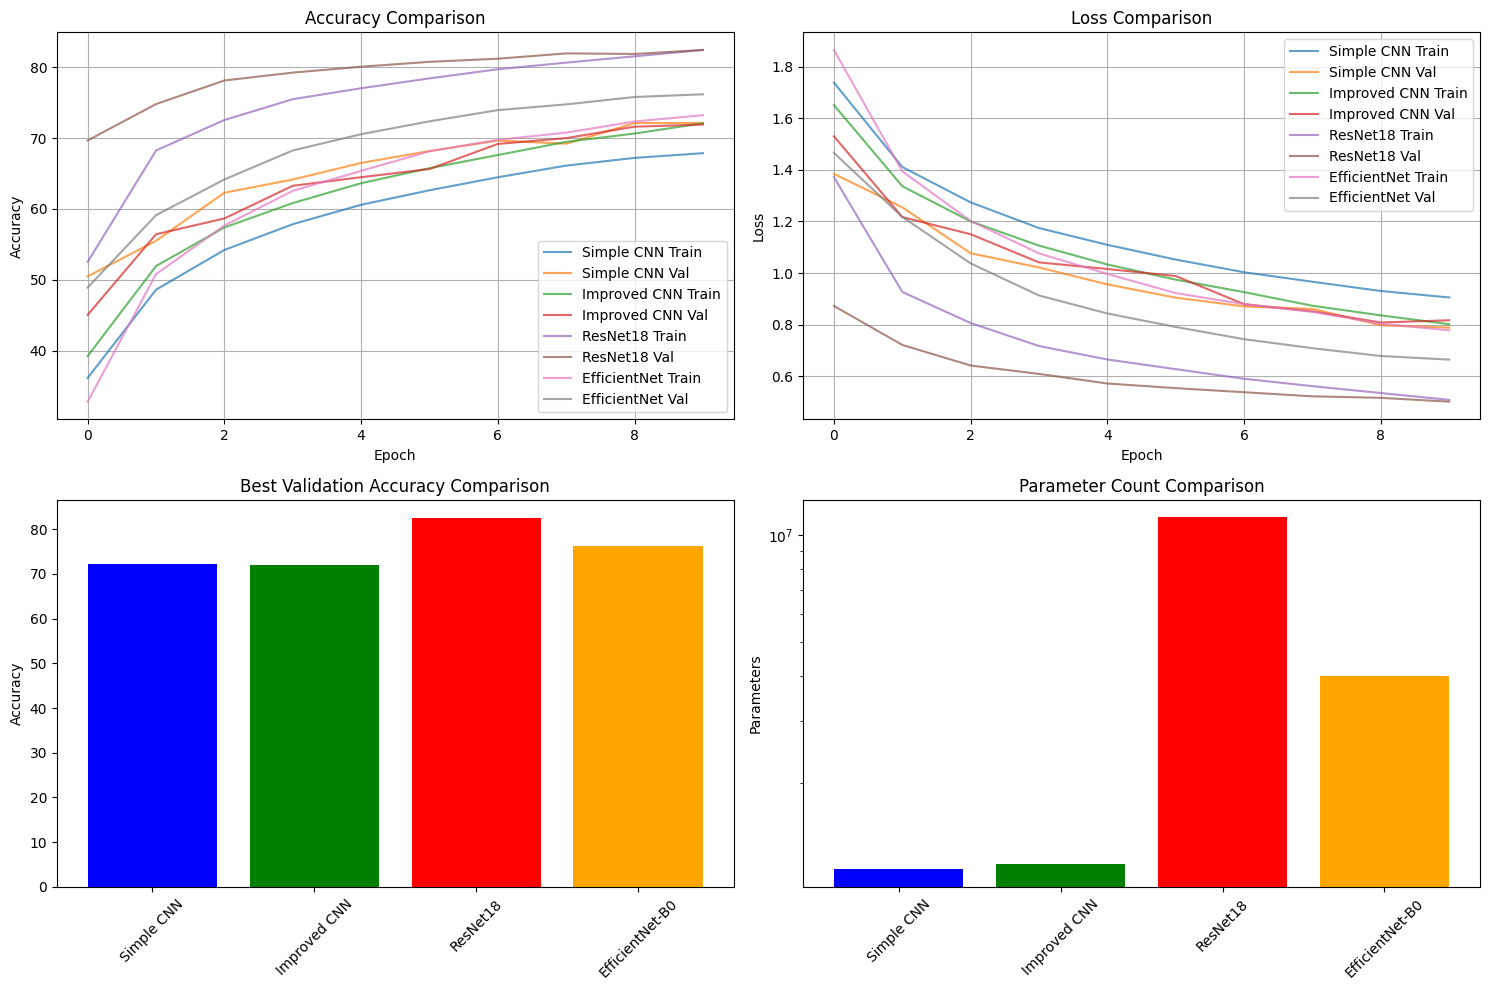

In [10]:
#will be comparing all the models here
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#accuracy
axes[0,0].plot(simple_history['train_acc'], label='Simple CNN Train', alpha=0.7)
axes[0,0].plot(simple_history['val_acc'], label='Simple CNN Val', alpha=0.7)
axes[0,0].plot(improved_history['train_acc'], label='Improved CNN Train', alpha=0.7)
axes[0,0].plot(improved_history['val_acc'], label='Improved CNN Val', alpha=0.7)
axes[0,0].plot(resnet_history['train_acc'], label='ResNet18 Train', alpha=0.7)
axes[0,0].plot(resnet_history['val_acc'], label='ResNet18 Val', alpha=0.7)
axes[0,0].plot(efficient_history['train_acc'], label='EfficientNet Train', alpha=0.7)
axes[0,0].plot(efficient_history['val_acc'], label='EfficientNet Val', alpha=0.7)
axes[0,0].set_title('Accuracy Comparison')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].legend()
axes[0,0].grid(True)

#loss
axes[0,1].plot(simple_history['train_loss'], label='Simple CNN Train', alpha=0.7)
axes[0,1].plot(simple_history['val_loss'], label='Simple CNN Val', alpha=0.7)
axes[0,1].plot(improved_history['train_loss'], label='Improved CNN Train', alpha=0.7)
axes[0,1].plot(improved_history['val_loss'], label='Improved CNN Val', alpha=0.7)
axes[0,1].plot(resnet_history['train_loss'], label='ResNet18 Train', alpha=0.7)
axes[0,1].plot(resnet_history['val_loss'], label='ResNet18 Val', alpha=0.7)
axes[0,1].plot(efficient_history['train_loss'], label='EfficientNet Train', alpha=0.7)
axes[0,1].plot(efficient_history['val_loss'], label='EfficientNet Val', alpha=0.7)
axes[0,1].set_title('Loss Comparison')
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('Loss')
axes[0,1].legend()
axes[0,1].grid(True)

#final accuracy
models = ['Simple CNN', 'Improved CNN', 'ResNet18', 'EfficientNet-B0']
best_accs = [
    max(simple_history['val_acc']),
    max(improved_history['val_acc']),
    max(resnet_history['val_acc']),
    max(efficient_history['val_acc'])
]

axes[1,0].bar(models, best_accs, color=['blue', 'green', 'red', 'orange'])
axes[1,0].set_title('Best Validation Accuracy Comparison')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].tick_params(axis='x', rotation=45)

#parameter count comparision
param_counts = [
    sum(p.numel() for p in simple_model.parameters()),
    sum(p.numel() for p in improved_model.parameters()),
    sum(p.numel() for p in resnet_model.parameters()),
    sum(p.numel() for p in efficient_model.parameters())
]

axes[1,1].bar(models, param_counts, color=['blue', 'green', 'red', 'orange'])
axes[1,1].set_title('Parameter Count Comparison')
axes[1,1].set_ylabel('Parameters')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

## Performance Summary

In [12]:
print("MODEL PERFORMANCE SUMMARY")
print("=" * 50)
print(f"{'Model':<15} {'Best Val Acc':<12} {'Parameters':<12} {'Efficiency'}")
print("-" * 50)
for i, model_name in enumerate(['Simple CNN', 'Improved CNN', 'ResNet18', 'EfficientNet-B0']):
    acc = best_accs[i]
    params = param_counts[i]
    efficiency = acc / (params / 1e6)  # Accuracy per million parameters
    print(f"{model_name:<15} {acc:<12.4f} {params:<12,} {efficiency:.4f}")
print(f"\nBest performing model: {models[np.argmax(best_accs)]}")
print(f"Most efficient model: {models[np.argmax([acc/params*1e6 for acc, params in zip(best_accs, param_counts)])]}")

MODEL PERFORMANCE SUMMARY
Model           Best Val Acc Parameters   Efficiency
--------------------------------------------------
Simple CNN      72.1200      1,147,914    62.8270
Improved CNN    71.9000      1,186,826    60.5818
ResNet18        82.4300      11,181,642   7.3719
EfficientNet-B0 76.1700      4,020,358    18.9461

Best performing model: ResNet18
Most efficient model: Simple CNN


## Test Set Evaluation


In [13]:
best_model_idx = np.argmax(best_accs)
best_model_name = models[best_model_idx]
if best_model_idx == 0:
    best_model, best_trainer = simple_model, simple_trainer
elif best_model_idx == 1:
    best_model, best_trainer = improved_model, improved_trainer
elif best_model_idx == 2:
    best_model, best_trainer = resnet_model, resnet_trainer
else:
    best_model, best_trainer = efficient_model, efficient_trainer
print(f"Evaluating best model: {best_model_name}")
test_results = best_trainer.evaluate(test_loader)
print(f"Test accuracy: {test_results['accuracy']:.4f}%")
print(f"Test loss: {test_results['loss']:.4f}")

Evaluating best model: ResNet18


Testing: 100%|███████████████████████████████| 157/157 [00:00<00:00, 295.90it/s]

Test accuracy: 82.5200%
Test loss: 0.5233


## confusion matrix and sample prediction

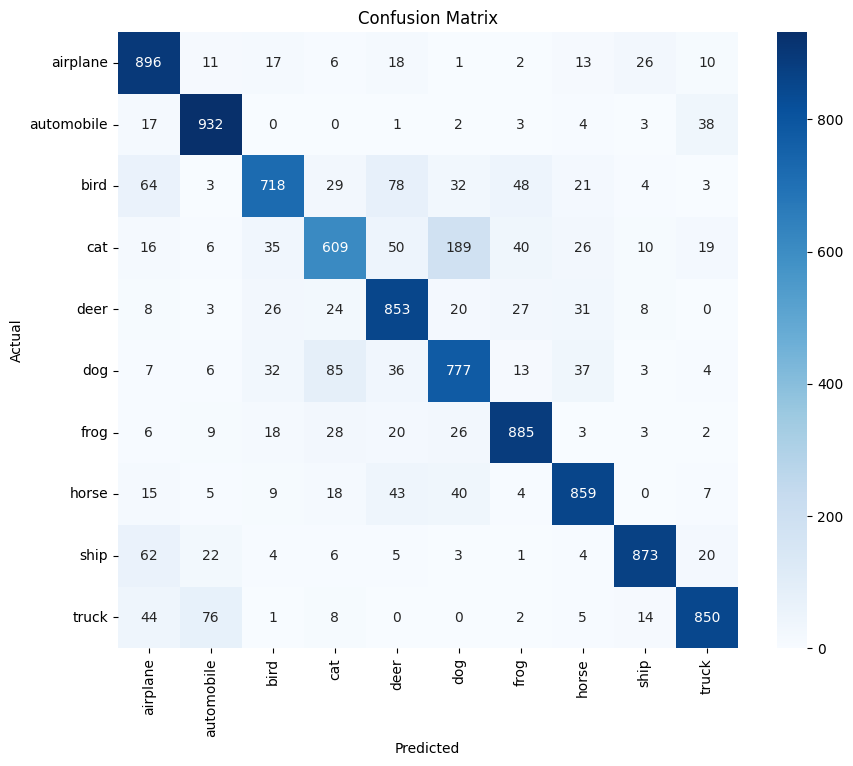

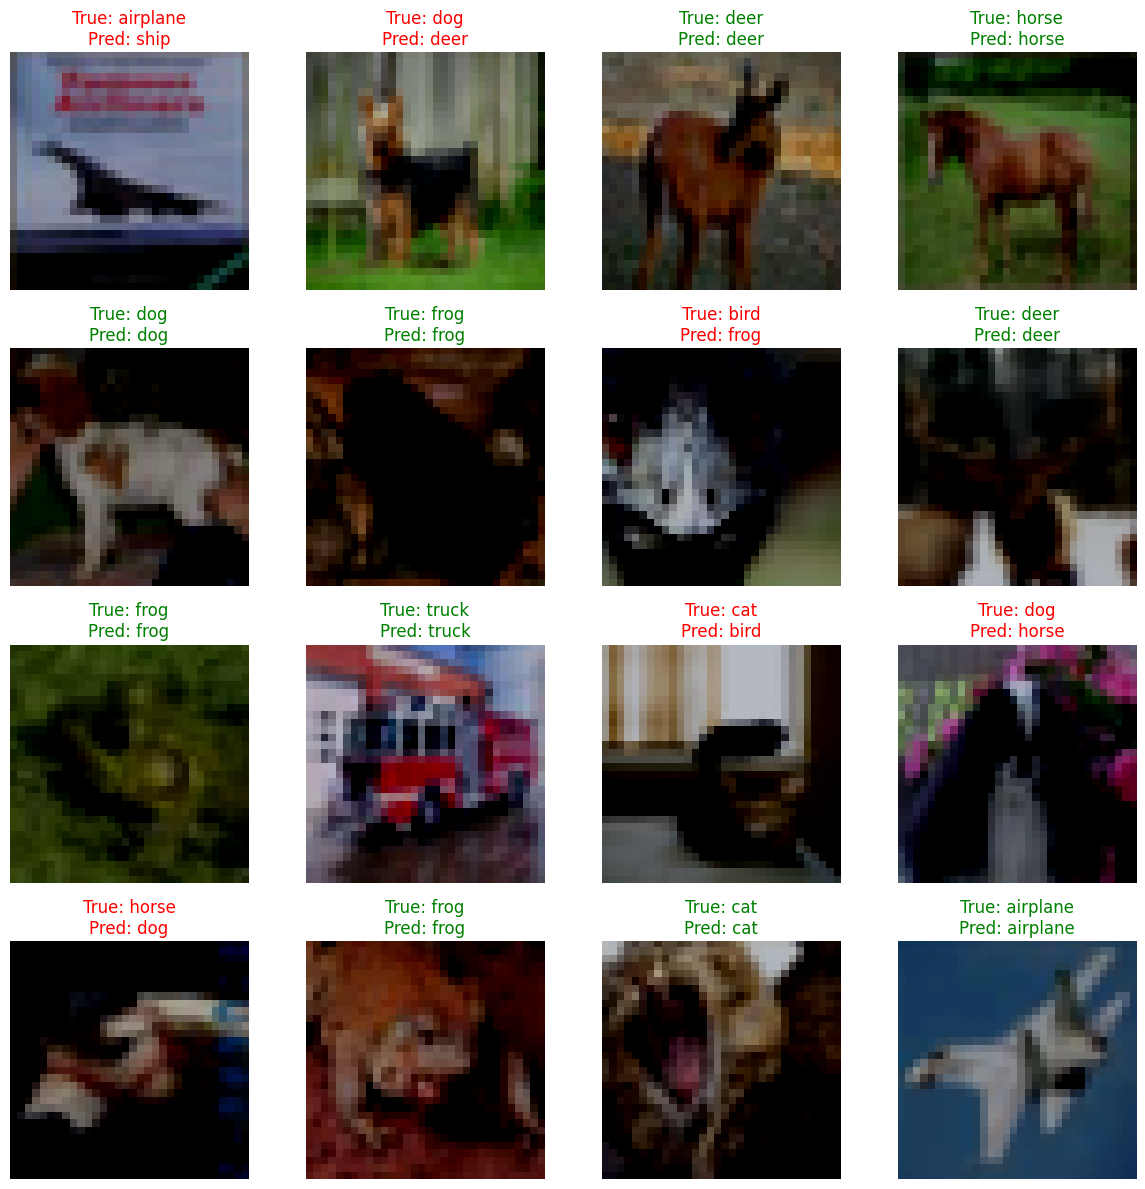

Analysis complete!


In [16]:
y_true = []
y_pred = []

for images, labels in test_loader:
    images, labels = images.to(config.device), labels.to(config.device)
    with torch.no_grad():
        outputs = best_model(images)
        predictions = outputs.argmax(dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

plot_confusion_matrix(np.array(y_true), np.array(y_pred), class_names)
from src.utils import plot_sample_predictions
plot_sample_predictions(best_model, test_loader, class_names, num_samples=16, device=config.device)

print("Analysis complete!")